In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import umap
import matplotlib.pyplot as plt


import logging
logger = logging.getLogger()  # Logger

logger.setLevel("INFO")
#logging.info("Hello")

In [2]:
def write_pickle(path, obj):
    with open(path, "wb") as f:
        pickle.dump(obj, f)
        
def read_pickle(path):
    with open(path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [4]:
features_incept_img_dict = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/FeatureExtraction/features_incept_without_top_img_dict.pkl")

In [5]:
img_features = list(features_incept_img_dict.values())

In [6]:
print(img_features[347])

[0.24807146 0.3238993  0.29161313 ... 0.38386863 0.30274186 0.39482015]


In [8]:
# cluster
k = 10
clusters = KMeans(k, random_state = 42)
clusters_incept = clusters.fit(img_features)

In [9]:
img_names_incept = list(features_incept_img_dict.keys())

# Clustering

In [11]:
image_cluster = pd.DataFrame(data={"image": [f"{name}_{idx}" for name, idx in features_incept_img_dict.keys()]})
image_cluster["clusterid"] = clusters.labels_
image_cluster["label"] = [x.split("_")[0] for x in image_cluster["image"]]
image_cluster

,image,clusterid,label
0,18QH2FGR4_0,1,18QH2FGR4
1,18QH2FGR4_1,1,18QH2FGR4
2,18QH2FGR4_2,1,18QH2FGR4
3,18QH2FGR4_3,1,18QH2FGR4
4,18QH2FGR4_4,1,18QH2FGR4
...,...,...,...
6056,ILH0VMVF5_831,8,ILH0VMVF5
6057,ILH0VMVF5_832,8,ILH0VMVF5
6058,ILH0VMVF5_833,8,ILH0VMVF5
6059,ILH0VMVF5_834,8,ILH0VMVF5


In [12]:
# UMAP projection of feature vectors
reducer = umap.UMAP()
df = pd.DataFrame(img_features)
embedding = reducer.fit_transform(df)
embedding.shape

(6061, 2)

In [ ]:
cmap = {"18QH2FGR4":0, 
        "1U76LU6J5":1, 
        "13T95PWU4":2,
        "1AA2LDX17":3,
        "1C73PUTH4":4,
        "1EV81RDT6":5,
        "1J324DWM3":6,
        "1L771K246":7,
        "1LH0VMVF5":8,
        "1Q5W1KH41":9}

for x in range(0,10):
    plt.scatter(
        embedding[image_cluster["label"]==[*cmap][x], 0],
        embedding[image_cluster["label"]==[*cmap][x], 1],
        c=sns.color_palette()[x],
        s=3,
        label=[*cmap][x])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=12)
plt.legend(loc="upper left")

In [11]:
image_cluster["UMAP1"] =  [embedding[i, 0] for i in range(image_cluster.shape[0])]
image_cluster["UMAP2"] =  [embedding[i, 1] for i in range(image_cluster.shape[0])]

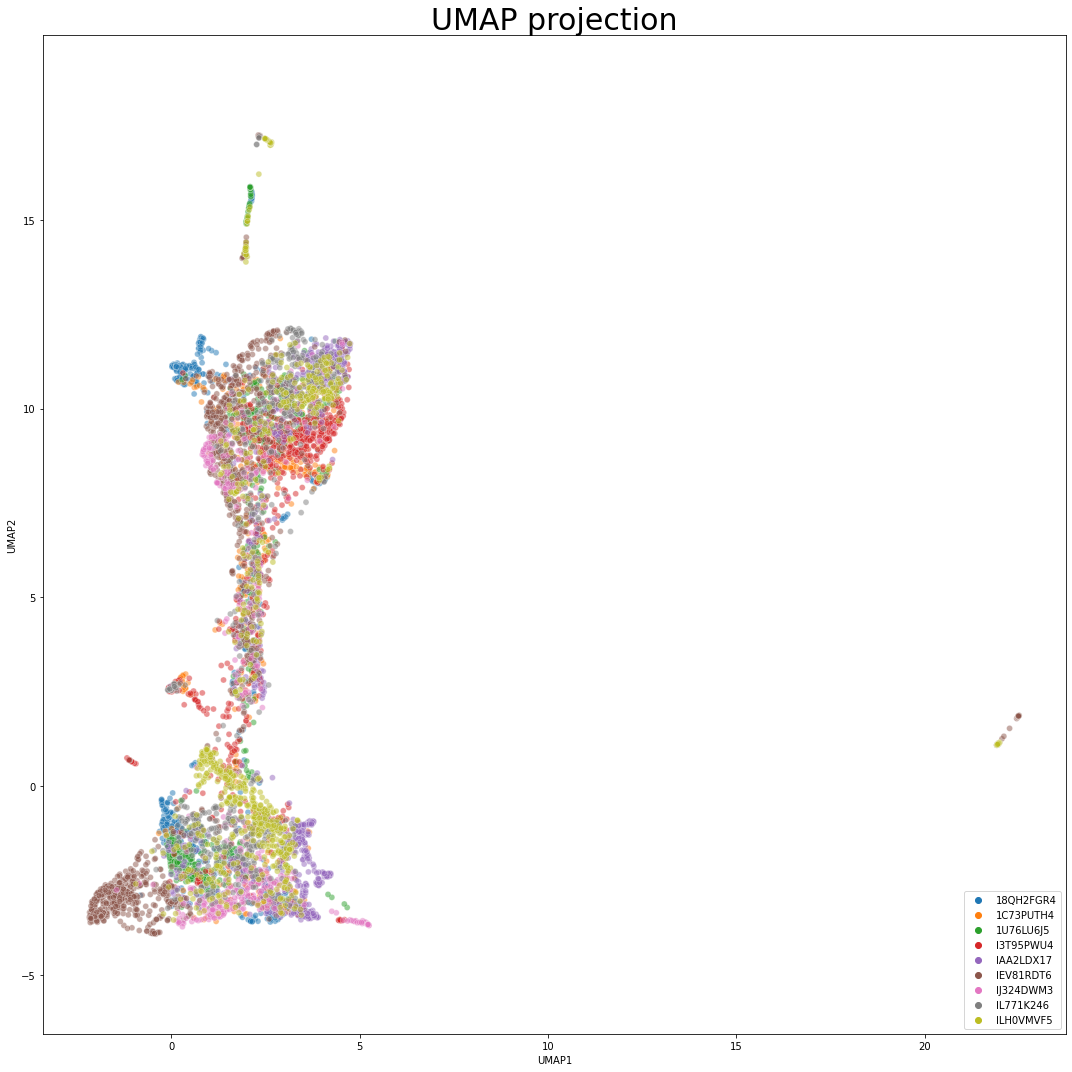

In [12]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=image_cluster, x="UMAP1", y="UMAP2", hue="patient", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()